In [3]:
!pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
df = pd.read_csv('datasets/Health_insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [9]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    1337
Name: count, dtype: int64

In [10]:
# data scaling
continuous_col = ['age', 'bmi', 'children']
categorical_col =['sex','region', 'smoker']

In [11]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), continuous_col),
        ('cat', OneHotEncoder(), categorical_col)])
df_processed = preprocessor.fit_transform(df)

In [12]:
column_names = ['age','bmi','children','sex_female','sex_male','region_northeast','region_northwest','region_southeast',
                'region_southwest', 'smoker_no','smoker_yes']
num_features = continuous_col
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_col)

# Combine feature names
column_names = list(num_features) + list(cat_features)

# Create a DataFrame from the processed data
df_processed_df = pd.DataFrame(df_processed, columns=column_names)

# Display the new DataFrame
print(df_processed_df.head())

        age       bmi  children  sex_female  sex_male  region_northeast  \
0 -1.440418 -0.453160 -0.909234         1.0       0.0               0.0   
1 -1.511647  0.509422 -0.079442         0.0       1.0               0.0   
2 -0.799350  0.383155  1.580143         0.0       1.0               0.0   
3 -0.443201 -1.305052 -0.909234         0.0       1.0               0.0   
4 -0.514431 -0.292456 -0.909234         0.0       1.0               0.0   

   region_northwest  region_southeast  region_southwest  smoker_no  smoker_yes  
0               0.0               0.0               1.0        0.0         1.0  
1               0.0               1.0               0.0        1.0         0.0  
2               0.0               1.0               0.0        1.0         0.0  
3               1.0               0.0               0.0        1.0         0.0  
4               1.0               0.0               0.0        1.0         0.0  


In [23]:
# linear regression modeling
X = df_processed_df[column_names]
y = df['charges']
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1337, 11), y shape: (1337,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =17)

In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
print(reg.score(X_test,y_test))

0.741295269577358


In [31]:
y_pred1 = reg.predict(X_test)

In [33]:
mae1 = mean_absolute_error(y_test, y_pred1).round(2)
mse1 = mean_squared_error(y_test, y_pred1).round(2)
mape1 = ((np.mean(np.abs(y_test-y_pred1)/y_test) * 100))

print(f"MAE: {mae1}\n MSE:{mse1} \n MAPE:{mape1}%.")

MAE: 4230.77
 MSE:31733673.18 
 MAPE:46.971077365674894%.


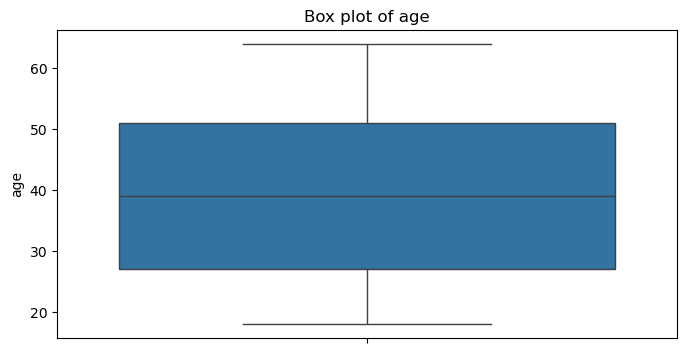

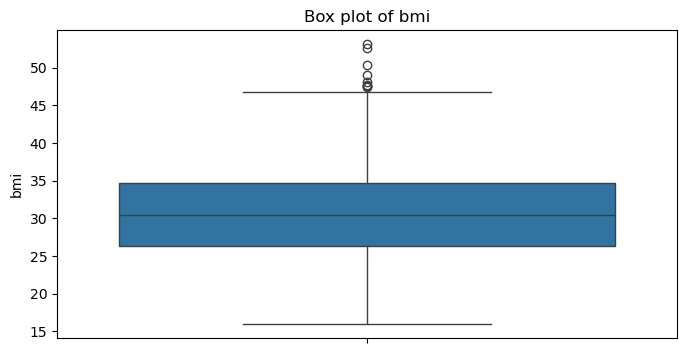

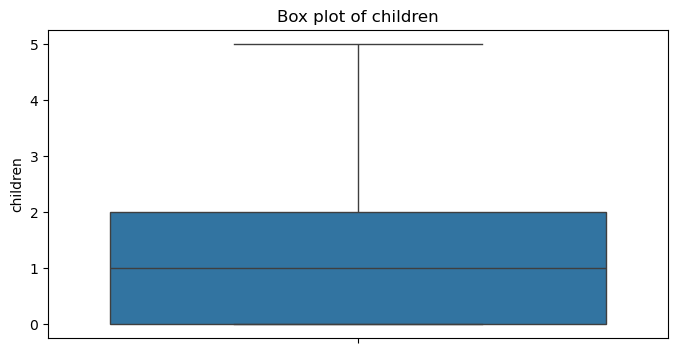

In [35]:
for col in continuous_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

## Experiment 2

In [38]:
## removing outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered_no_outliers = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

df_processed_no_outliers = preprocessor.fit_transform(df_filtered_no_outliers)

df_processed_no_outliers_df = pd.DataFrame(df_processed_no_outliers, columns=column_names)

X = df_processed_no_outliers_df
y = df_filtered_no_outliers['charges']  

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1328, 11), y shape: (1328,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (1062, 11), y_train shape: (1062,)


In [44]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [46]:
print(reg.score(X_test,y_test))

0.7451054950756222


In [48]:
y_pred1 = reg.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred1).round(2)
mse1 = mean_squared_error(y_test, y_pred1).round(2)
mape1 = ((np.mean(np.abs(y_test-y_pred1)/y_test) * 100))

print(f"MAE: {mae1}\n MSE:{mse1} \n MAPE:{mape1}%.")

MAE: 4137.21
 MSE:35430012.68 
 MAPE:41.567640242671544%.


## Experiment 3

In [51]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

model3 = sm.OLS(y_train, X_train).fit()

In [53]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     396.3
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          2.67e-311
Time:                        15:43:59   Log-Likelihood:                -10748.
No. Observations:                1062   AIC:                         2.151e+04
Df Residuals:                    1053   BIC:                         2.156e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3635.9761    186.460  

In [55]:
X = X.drop(['sex_female', 'sex_male'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =17)

In [63]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

model3 = sm.OLS(y_train, X_train).fit()

In [83]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     894.1
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:37:10   Log-Likelihood:                -10706.
No. Observations:                1062   AIC:                         2.142e+04
Df Residuals:                    1057   BIC:                         2.145e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age         3659.7179    180.078     20.323      0.0

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature       VIF
0         age  1.015653
1         bmi  1.013513
2    children  1.002005
3   smoker_no  1.000142
4  smoker_yes  1.000556
